<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/%E2%80%9EEnsemble_testing_ipynb%E2%80%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


Load IRIS database and do Decision Tree clasification.

In [6]:
X, y = load_iris(return_X_y=True)


## *Let's do in correct way by spliting data into training, validation and testing sets with stratified spliting*


In [7]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)
np.bincount(y_temp)

array([40, 40, 40])

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=10, shuffle=True, stratify=y_temp)
X_train.shape

(96, 4)

Scaling data by normalisation.


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)
X_valid_std=scaler.transform(X_valid)

In [10]:
from sklearn.preprocessing import MinMaxScaler


In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)
X_valid_mm=scaler.transform(X_valid)

In [12]:
dtc_1 = RandomForestClassifier(random_state=123)
dtc_1.fit(X_train, y_train)
y_pred = dtc_1.predict(X_test)
scores_dtc_1=metrics.accuracy_score(y_test,y_pred)
print('Acc_RandomForestClassifier = ', scores_dtc_1)



Acc_RandomForestClassifier =  0.9666666666666667


In [13]:
metrics.confusion_matrix(y_test,y_pred,  labels = [1, 2, 3])

array([[10,  0,  0],
       [ 1,  9,  0],
       [ 0,  0,  0]])

Feature: 0, Score: 0.09743
Feature: 1, Score: 0.02969
Feature: 2, Score: 0.42175
Feature: 3, Score: 0.45112


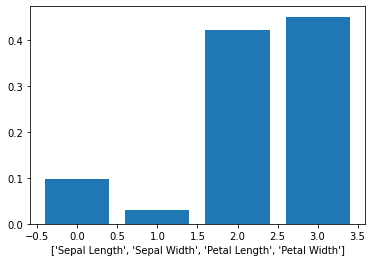

In [14]:
importance = dtc_1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV
#create a new random forest classifier
rf = RandomForestClassifier(criterion="entropy")
#create a dictionary of all values we want to test for n_estimators
params_rf = {"n_estimators": [1, 2, 3, 5, 9,11]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)
#check best n_estimators value
print(rf_gs)
print(rf_gs.best_params_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'n_estimators': [1, 2, 3, 5, 9, 11]})
{'n_estimators': 5}


Bagging classifier (https://www.geeksforgeeks.org/ml-bagging-classifier/)

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# initialize the base classifier
base_cls = DecisionTreeClassifier(criterion="entropy")
  
# no. of base classifier
num_trees = 50
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 123)
model_b = model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model_b.predict(X_test)
scores_abc=metrics.accuracy_score(y_test,y_pred)
print('Acc_BaggingClassifier = ', scores_abc)


Acc_BaggingClassifier =  0.9666666666666667


AdaBoost Classifier (https://www.datacamp.com/tutorial/adaboost-classifier-python)

In [17]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
scores_abc=metrics.accuracy_score(y_test,y_pred)
print('Acc_AdaBoostClassifier = ', scores_abc)

Acc_AdaBoostClassifier =  0.9666666666666667


In [18]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


# **How to Develop XGBoost Model**

In [22]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: " ,accuracy)


Accuracy:  0.9666666666666667


array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])